In [156]:
# Useful imports
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from us import states

In [157]:
# Read the CSV file
FF_Locations = pd.read_csv("Datafiniti_Fast_Food_Restaurants.csv")

# Group all the data by states
FF_by_state = FF_Locations.groupby('province').size().reset_index(name='counts')

# Use match() to find the corresponding full state names
FF_by_state['region'] = FF_by_state['province'].apply(lambda x: states.lookup(x).name if states.lookup(x) is not None else x)

# Convert to lowercase
FF_by_state['region'] = FF_by_state['region'].str.lower()





In [158]:
# Get the map data for US states
us_map = gpd.read_file('cb_2018_us_state_500k.shp')  # Update this with the path to your shapefile
us_map = us_map[us_map['STUSPS'].isin(FF_by_state['province'])]
# Merge your data with the map data
merged_data = us_map.set_index('STUSPS').join(FF_by_state.set_index('province'))

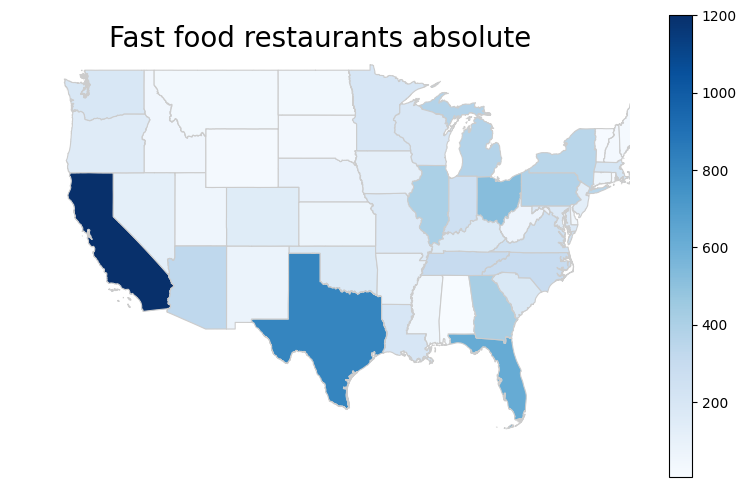

In [159]:
# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))  # Adjust the figure size

merged_data.plot(column='counts', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Fast food restaurants absolute',fontsize=20)

# Remove the border
ax.axis('off')

# Adjust the extent of the plot to focus on the area below Canada
ax.set_xlim(-130, -70)  # Adjust these values as needed
ax.set_ylim(24, 50)  # Adjust these values as needed

plt.show()


In [160]:
# Read the population data
population_data = pd.read_csv("state_population.csv")  # Update this with your population data

# Convert the 'population' column to numeric, coercing non-numeric values to NaN
population_data['population'] = pd.to_numeric(population_data['population'], errors='coerce')

# Merge the fast food and population data
merged_data = FF_by_state.merge(population_data, left_on='region', right_on='state')

# Optional: Remove rows with NaN in the 'population' column
merged_data = merged_data.dropna(subset=['population'])

# Now you can calculate the number of fast food restaurants per capita
merged_data['counts_per_capita'] = merged_data['counts']/ merged_data['population']

# Merge your data with the map data
merged_data = us_map.set_index('STUSPS').join(merged_data.set_index('province'))

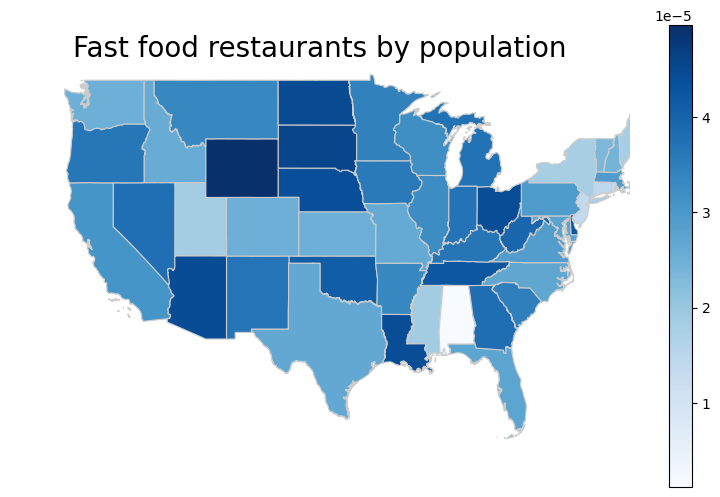

In [161]:
# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))  # Adjust the figure size as needed

merged_data.plot(column='counts_per_capita', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Fast food restaurants by population',fontsize=20)

# Remove the border
ax.axis('off')

# Adjust the extent of the plot to focus on the area below Canada
ax.set_xlim(-130, -70)  # Adjust these values as needed
ax.set_ylim(24, 50)  # Adjust these values as needed

plt.show()

In [163]:
# Group all the data by states
FF_by_chain = FF_Locations.groupby('name').size().reset_index(name='counts')

In [166]:
FF_Locations['categories'].unique() 
#if fast food restraunt remove
#replace ff restraunt words

array(['American Restaurant and Fast Food Restaurant',
       'Fast Food Restaurants', 'Fast Food Restaurant', 'Fast Food',
       'Fast Food Restaurant and Ice Cream Shop',
       'Ice Cream Shop and Fast Food Restaurant',
       'Fast Food Restaurant and Mexican Restaurant',
       'Fast Food Restaurant and Burger Joint', 'Fast food restaurants',
       'Fast Food Restaurant, Mexican Restaurant, and Taco Place',
       'American Restaurant, Sandwich Place, and Fast Food Restaurant',
       'Fast Food Restaurant, American Restaurant, and Sandwich Place',
       'Burger Joint and Fast Food Restaurant Gulf Breeze',
       'Fast Food Restaurant, Sandwich Place, and American Restaurant',
       'Restaurant, Fast Food Restaurant, and Sandwich Place',
       'Fast Food Restaurant and Playground',
       'Sandwich Place, Pizza Place, and Fast Food Restaurant',
       'American Restaurant, Fast Food Restaurant, and Sandwich Place',
       'Ice Cream Shop and Fast Food Restaurant Christian Par